
# Introduction to Digital Image Processing 361.1.4751
# Exercise 2 - Color Spaces

For any questions regarding this assignment, please refer to the course forum on the Moodle website. For personal questions *only* please email  asaliam@bgu.ac.il




---

**You are allowed to add or remove cells as needed. Please ensure all cells are executed before submitting, and verify that all outputs are included in your submission !**

---

**Note** : Whenever showing the different channels, use a colormap if needed
(and only if needed!)



# 1. RGB and Grayscale (20 points)
In this exercise we will examine the relation between the grayscale and RGB image.


1.1 Read the image "picasso.jpg". Convert the image to “double” and normalize to the range [ 0 , 1 ].

In [18]:
print("Maya Simhi id:207487653\nHodaya Cohen id:322617408")
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image named picasso.jpg
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/images/EX2'
image_path = f"{drive_path}/picasso.jpg"
image_picasso = cv2.imread(image_path)
img = image_picasso.astype(np.float64)

# Normalize the image to the range [0, 1]
img = img / 255.0


Maya Simhi id:207487653
Hodaya Cohen id:322617408
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 Display the image with the ```matplotlib.pyplot.imshow( )``` function.


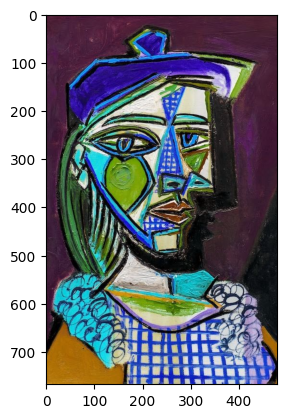

In [2]:
# Display the image
plt.imshow(img)
plt.show()

1.3 Extract the separate R, G and B channels from the image and display
them.

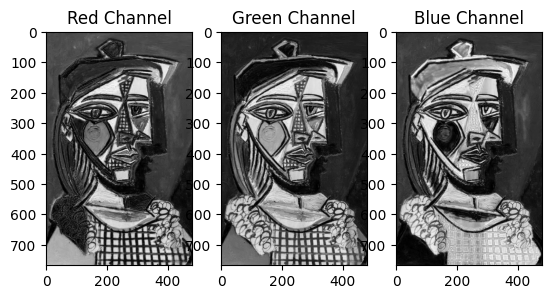

In [3]:
def extract_RGB(image):
  # Extract the R=0, G=1, and B=2 channels
  r = img[:, :, 0]
  g = img[:, :, 1]
  b = img[:, :, 2]
  return r, g, b

r, g, b = extract_RGB(img)
# Display the channels
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')

plt.show()

1.4 Write your own function that converts an RGB image to grayscale ```dip_rgb2gray( )```.

$$Gray = 0.2125 * R + 0.7154 * G + 0.0721 * B$$



In [4]:
def dip_rgb2gray(rgb_image):
  r, g, b = extract_RGB(rgb_image) # Extract RGB
  gray_image = 0.2125 * r + 0.7154 * g + 0.0721 * b # Convert to the function as above
  return gray_image

1.5 Compare your results to the ```skimage.color.rgb2gray( )``` function.
Use some **measure** to show that the images are similar

In [5]:
from skimage.color import rgb2gray
gray_img_mine = dip_rgb2gray(img) # Our Function
gray_img_skimage = rgb2gray(img) # skimage function
print(f"Mean Squared Error (MSE):{np.mean((gray_img_mine - gray_img_skimage)**2)}") # MSE calculation and print

Mean Squared Error (MSE):4.711127443152796e-34


Explanation:
As you can see the MSE is really small, but still not zero becuase of rgb2gray optimizations as appose to mine basif function

# 2. Additive vs Subtractive Color space (20 points)
In this exercise we will examine the difference between additive and subtractive
color spaces. We will examine the visual properties of the CYMK colorspace


2.1 Briefly explain about the CYMK color space.

**Answer :**

CYMK is simmaller to RGB, it uses cyan, yellow magenta an key (which is black) colors, we mostly use it in printing stuff

2.2 Create the CYMK channels from the RGB channels and display each
separately :

* (a) $$Black = minimum ( 1 - Red, 1 - Green, 1 - Blue )$$
* (b) $$Cyan = ( 1 - Red - Black ) / ( 1 - Black )$$
* (c) $$Magenta = ( 1 - Green - Black ) / ( 1 - Black )$$
* (d) $$Yellow = ( 1 - Blue - Black ) / ( 1 - Black )$$

2.3 Display the separate channels using the provided ```displayCYMK( )``` function.

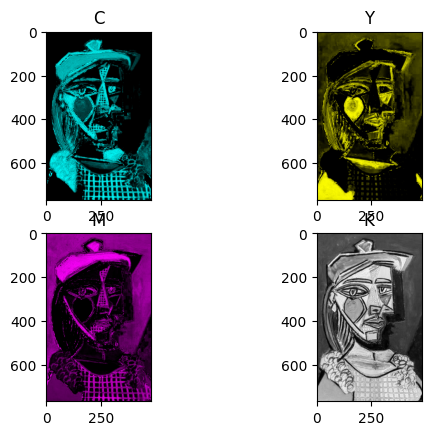

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def displayCYMK(C, Y, M, K):
    """
    This function displays the CYMK channels in the correct colors.
    The inputs are:
    C - an NxM matrix of type double of the cyan channel in the range [0,1]
    Y - an NxM matrix of type double of the yellow channel in the range [0,1]
    M - an NxM matrix of type double of the magenta channel in the range [0,1]
    K - an NxM matrix of type double of the black channel in the range [0,1]
    The function opens a new figure and displays all four channels in subplots
    """

    W = np.zeros_like(C)

    Yout = np.stack((Y, Y, W), axis=-1)
    Mout = np.stack((M, W, M), axis=-1)
    Cout = np.stack((W, C, C), axis=-1)
    Kout = np.stack((1 - K, 1 - K, 1 - K), axis=-1)

    plt.figure()
    plt.subplot(2, 2, 1)
    plt.title('C')
    plt.imshow(Cout)

    plt.subplot(2, 2, 2)
    plt.title('Y')
    plt.imshow(Yout)

    plt.subplot(2, 2, 3)
    plt.title('M')
    plt.imshow(Mout)

    plt.subplot(2, 2, 4)
    plt.title('K')
    plt.imshow(Kout)

    plt.show()

def createCYMNKFromRGB(rgb_image):
  r, g, b = extract_RGB(rgb_image) # Extract RGB
  k = np.min(np.stack((1 - r, 1 - g, 1 - b)), axis=0)  # Black
  c = (1 - r - k) / (1 - k + 1e-10)  # Cyan, add small value to denominator to avoid division by zero
  m = (1 - g - k) / (1 - k + 1e-10)  # Magenta
  y = (1 - b - k) / (1 - k + 1e-10)  # Yellow
  return c, y, m, k

C, Y, M, K = createCYMNKFromRGB(img)
displayCYMK(C, Y, M, K)



# 3. HSV (15 points)
In this exercise we will examine the difference between the HSV and RGB representations. We will see the effects of changing the values of separate channels.




3.1 Briefly explain about the HSV color space.

**Answer :**


---

HSV is Hue, saturation, value. Hue - is the pure color in degrees (where 0 is read, 120 green and 240 blue), Saturation - is intensity it's between 0 to 1 (o no color 1 vivid color). Value - is how much light or dark, it's between 0 to 1 (o is balck 1 is as bright as you can)

3.2 Write your own function that converts an RGB image to HSV ```dip_rgb2hsv( )```.


In [7]:
def dip_rgb2hsv(rgb_image):
  r, g, b = extract_RGB(rgb_image) # Extarct RGB
  max_rgb = np.max(rgb_image, axis=2) # Get max
  min_rgb = np.min(rgb_image, axis=2) # Get min

  # We will put the V as the max value
  v = max_rgb

  s = (max_rgb - min_rgb) / (max_rgb + 1e-10) # The e-10 is to not divide 0

  # Intilaizing H
  h = np.zeros_like(v)

  # Calculate hue for non-zero saturation
  # If S = 0 (grayscale), H is undefined (we set it to 0).
  # If Max = R, H = (G - B) / (Max - Min).
  # If Max = G, H = 2 + (B - R) / (Max - Min).
  # If Max = B, H = 4 + (R - G) / (Max - Min).
  mask = s != 0
  h[mask] = np.where(max_rgb[mask] == r[mask], (g[mask] - b[mask]) / (max_rgb[mask] - min_rgb[mask] + 1e-10),
                    np.where(max_rgb[mask] == g[mask], 2 + (b[mask] - r[mask]) / (max_rgb[mask] - min_rgb[mask] + 1e-10),
                             4 + (r[mask] - g[mask]) / (max_rgb[mask] - min_rgb[mask] + 1e-10)))
  # Normalize h to [0, 1]
  h[mask] = (h[mask] / 6) % 1

  hsv_image = np.stack((h, s, v), axis=-1)

  return hsv_image

3.3 Convert the image to HSV and display the separate channels.



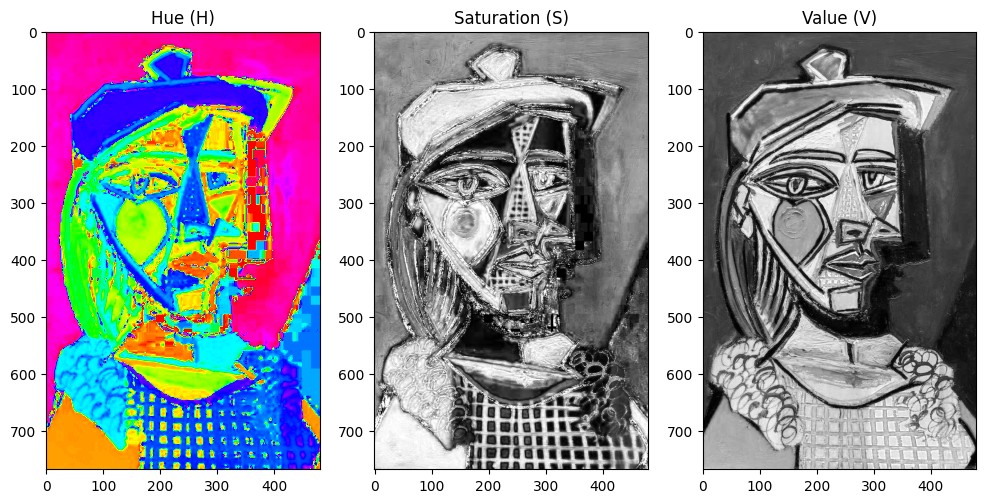

In [8]:
# Convert the image to HSV
hsv_img = dip_rgb2hsv(img)

# Extract the H, S, and V channels
h = hsv_img[:, :, 0]
s = hsv_img[:, :, 1]
v = hsv_img[:, :, 2]

# Display the channels
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')  # Use 'hsv' colormap for hue
plt.title('Hue (H)')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation (S)')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value (V)')

plt.show()


3.4 Read the note in the beginning of the exercise.
 When "hsv" colormap is needed and why? What is wrong with using "hsv" colormap when not needed?


I would use hsv colormap when the picture is more repesents hue values and cyclic data, becuase after 360 it goex back again to 0. in some cases I can get the wrong colors (if it's not cyclic) and the picture will look difrently then it should

3.5 Compare your results to the ```skimage.color.rgb2hsv( )``` function.


In [9]:
from skimage.color import rgb2hsv
#Convert to HSV using both functions
hsv_img_dip = dip_rgb2hsv(img)
hsv_img_skimage = rgb2hsv(img)

# Calculate the Mean Squared Error (MSE) for each channel
mse_h = np.mean((hsv_img_dip[:, :, 0] - hsv_img_skimage[:, :, 0])**2)
mse_s = np.mean((hsv_img_dip[:, :, 1] - hsv_img_skimage[:, :, 1])**2)
mse_v = np.mean((hsv_img_dip[:, :, 2] - hsv_img_skimage[:, :, 2])**2)

# Print the MSE values
# It wasn't specified how to compare the result so I did MSE
print(f"MSE (Hue): {mse_h}")
print(f"MSE (Saturation): {mse_s}")
print(f"MSE (Value): {mse_v}")

MSE (Hue): 7.415028869380236e-20
MSE (Saturation): 1.8773944691942464e-18
MSE (Value): 0.0


3.6 Switch the order of the RGB channels and then convert to HSV using
```dip_rgb2hsv()```. Display the separate channels. Which channels changed? Why?

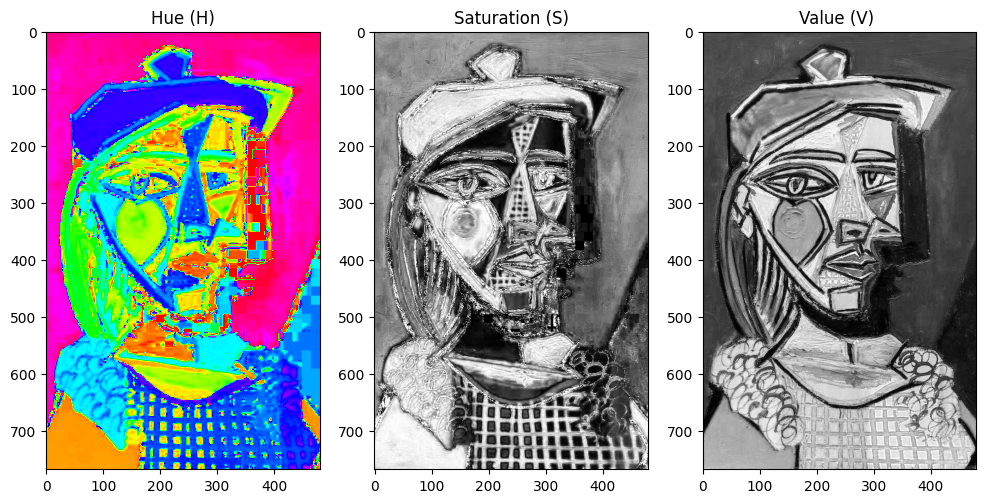

In [11]:
# Switch the order of RGB channels to BGR
swapped_img = img.copy()
swapped_img[:, :, 0], swapped_img[:, :, 1] = img[:, :, 1], img[:, :, 0]

# Convert the modified image to HSV
hsv_img_swapped = dip_rgb2hsv(swapped_img)

# Extract the H, S, and V channels
h_swapped = hsv_img_swapped[:, :, 0]
s_swapped = hsv_img_swapped[:, :, 1]
v_swapped = hsv_img_swapped[:, :, 2]

# Display the channels
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(h_swapped, cmap='hsv')
plt.title('Hue (H)')

plt.subplot(1, 3, 2)
plt.imshow(s_swapped, cmap='gray')
plt.title('Saturation (S)')

plt.subplot(1, 3, 3)
plt.imshow(v_swapped, cmap='gray')
plt.title('Value (V) ')

plt.show()

Explanation: As expected s and v didn't change becuase they are not realted to any spceific channel, but h did, as he cares about each channel"

# 4. L* a* b* (15 points)
In this exercise we will examine the difference between the L*a*b representations. We will see the effects of changing the values of separate channels.




4.1 Briefly explain about the L* a* b* color space.


**Answer :**


---

L represnets the lightness of the color (between 0-black and 100-white). a represnets the range beteween green and red(positive is more red, negitive green). b epresnets the range beteween blue and yellow(positive is more yellow, negitive blue)

4.2 Convert the image to L* a* b* using the
```skimage.color.rgb2lab( )``` function and display the separate channels.

Note: This time do not normalize each channel after the manipulation.

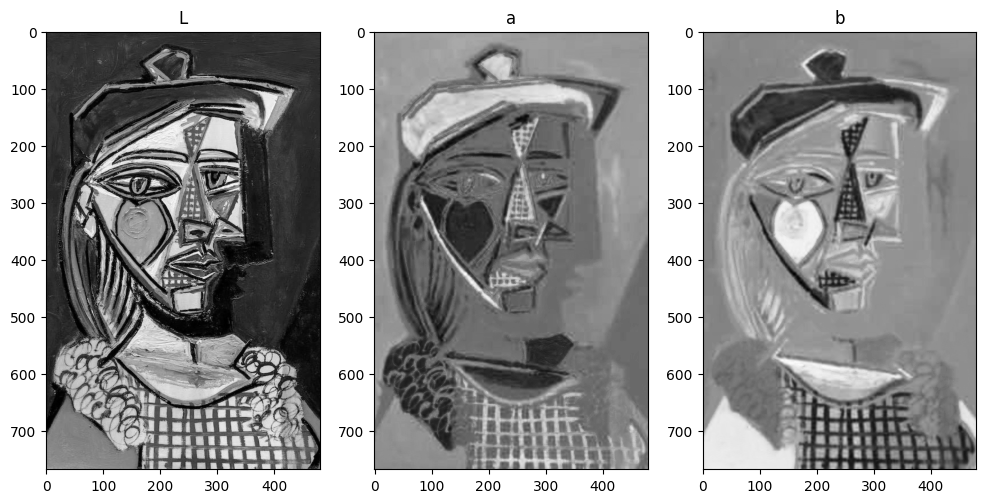

In [19]:
from skimage import io, color
# Convert to L*a*b* color space
lab_img = color.rgb2lab(img)

# Split the L*a*b* channels
L, a, b = lab_img[:, :, 0], lab_img[:, :, 1], lab_img[:, :, 2]
# Display the channels

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(L, cmap='gray')
plt.title('L')

plt.subplot(1, 3, 2)
plt.imshow(a, cmap='gray')
plt.title('a')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('b')

plt.show()

# 5 Compare color spaces (10 points)
In this exercise we will examine channel manipulation for each space.


5.1 Manipulate the values and the order of the channels of each color space
and display the manipulated channels separately (you may also show the colored image after the manipulation). Choose one manipulation. Explain the
manipulations you chose and their effects.

For example:

1. Apply a linear function to one of the channels, denoted by *I* :
$$F( I ) = a · I + b.$$ Try for example $$a = -1 , b = 1$$
2. Apply a low-pass filter as in Ex.1 to one of the channels. A gaussian filter
for example.


Notes:
1. Make sure each channel of the image stays within the range [0,1]
(except for L* a* b* color space).

2. Choose manipulations that suite the color space. If your manipulation
does not change the image at all, it is not a suitable manipulation.

3. In your explanation, do not refer only to the obvious changes, i.e., ‘We
switched the R and G channels in the RGB image, and we can see that the
red flowers turned green, and the grass turned red’. Try to explain deeper
results (for example in RGB channel swap - what happened to Yellow?,
and why it makes sense?)

4. Display the results using the provided functions: ```imshowCYMK( )```, ```imshowHSV( )```,```imshowLab( )```

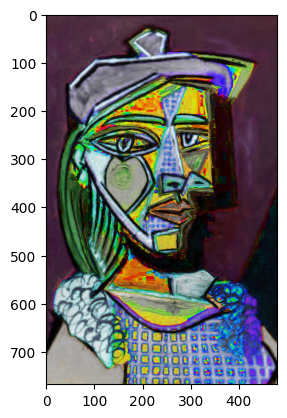

Becuase we did a = -1 we can see that we get less intanse picture but we did b =1 so it's not a lot less intanse


<ipython-input-31-cb5063ab2212>:51: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 36055 negative Z values that have been clipped to zero
  RGB = lab2rgb(lab)


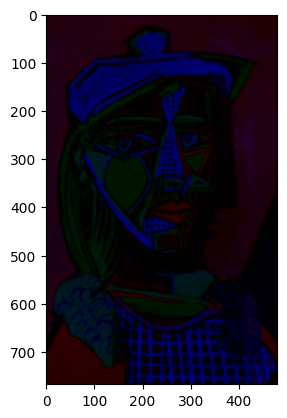

Becuase we did a = -1 we can see that we get less bright picture but we did b =1 so it's not a lot less bright


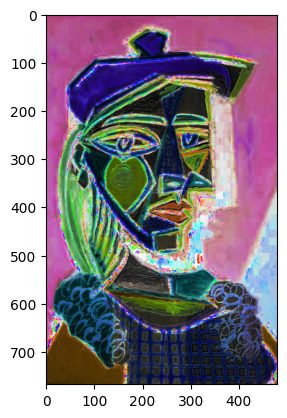

Becuase we did a = -1 we can see that we get not dark picture but we did b =1 so we still see some dark places


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import hsv2rgb
from skimage.color import lab2rgb


def imshowCYMK(C, Y, M, K):
    """
    This function is equivalent to imshow but displays the CYMK as a color image.
    The inputs are:
    C - an NxM matrix of type double of the cyan channel in the range [0,1]
    Y - an NxM matrix of type double of the yellow channel in the range [0,1]
    M - an NxM matrix of type double of the magenta channel in the range [0,1]
    K - an NxM matrix of type double of the black channel in the range [0,1]
    The function does not open a new figure
    """
    Ci = (1 - C)
    Yi = (1 - Y)
    Mi = (1 - M)
    Ki = (1 - K)
    RGB = np.stack((Ci * Ki, Mi * Ki, Yi * Ki), axis=-1)

    plt.imshow(RGB)
    plt.show()

def imshowHSV(H, S, V):
    """
    This function is equivalent to imshow but displays the HSV as a color image.
    The inputs are:
    H - an NxM matrix of type double of the hue channel in the range [0,1]
    S - an NxM matrix of type double of the saturation channel in the range [0,1]
    V - an NxM matrix of type double of the value channel in the range [0,1]
    The function does not open a new figure
    """
    HSV = np.stack((H, S, V), axis=-1)
    RGB = hsv2rgb(HSV)

    plt.imshow(RGB)
    plt.show()

def imshowLab(L, a, b):
    """
    This function is equivalent to imshow but displays the L*a*b as a color image.
    The inputs are:
    L - an NxM matrix of type double of the Luminence channel in the range [0,1]
    a - an NxM matrix of type double of the a channel in the range [0,1]
    b - an NxM matrix of type double of the b channel in the range [0,1]
    The function does not open a new figure
    """
    lab = np.stack((L, a, b), axis=-1)
    RGB = lab2rgb(lab)

    plt.imshow(RGB)
    plt.show()

a = -1  # Adjust the slope
b = 1   # Adjust the intercept

# manipulte HSV
hsv_img = dip_rgb2hsv(img)

# Access the desired channel (e.g., saturation)
S = hsv_img[:, :, 1]

# Apply the linear function (adjust a and b as needed)
manipulated_S = a * S + b

# Clip the values to the valid range (0-1 for HSV saturation)
manipulated_S = np.clip(manipulated_S, 0, 1)


imshowHSV(hsv_img[:, :, 0], manipulated_S, hsv_img[:, :, 2])
print("Becuase we did a = -1 we can see that we get less intanse picture but we did b =1 so it's not a lot less intanse")

# manipulte L*a*b
lab_img = color.rgb2lab(img)

# Access the desired channel (e.g., L channel)
l_channel = lab_img[:, :, 0]

# Apply the linear function (adjust a and b as needed)
manipulated_l = a * l_channel + b
manipulated_l = np.clip(manipulated_l, 0, 1)
imshowLab(manipulated_l, lab_img[:, :, 1], lab_img[:, :, 2])
print("Becuase we did a = -1 we can see that we get less bright picture but we did b =1 so it's not a lot less bright")


cymk_img = createCYMNKFromRGB(img)
c, y, m, k = cymk_img
manipulated_k  =  a * k + b
manipulated_k = np.clip(manipulated_k, 0, 1)
imshowCYMK(c, y, m, manipulated_k)
print("Becuase we did a = -1 we can see that we get not dark picture but we did b =1 so we still see some dark places")





# 6 Playing With Colors (20 points)

In this exercise we will try to solve real world problems with your newly acquired knowledge.


# 6.1 Color Segmentation (20 points)

6.1.1 Use color spaces and other previously learned subjects to automatically
circle the blue cap (of the soda bottle) in the "cap1/2/3.png" images enclosed to this assignment. Read notes below on how to circle.


Notes:
* Your algorithm should be robust, automatic and without any prior
knowledge about the spatial location of the cap. Meaning that you
can't assume the cap is in the bottom right of the image or build a
mask of the cap and search for the closest match in the image. Please
use the color spaces and other previously learned subjects.

* In this question you may use built-in functions to post-process a mask
and to draw a circle (e.g. ```scipy.ndimage.median filter()```,```cv2.circle()```).

* Your algorithm may fail on some cases, if it happens explain why.


(a) Read the "cap*.jpg" images and normalize them to [0 − 1].


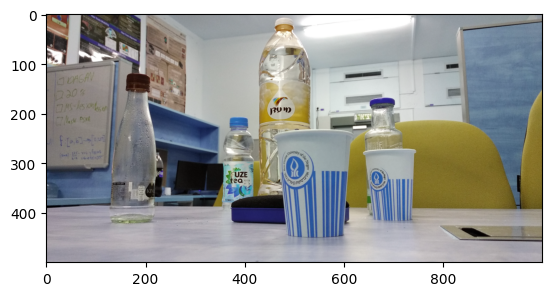

In [14]:
image_path = f"{drive_path}/cap3.png" # todo this should be jpg
image_picasso = cv2.imread(image_path)
img = image_picasso.astype(np.float64)

# Normalize the image to the range [0, 1]
img = img / 255.0
plt.imshow(img)
plt.show()

(b) Find the blue cap of the soda bottle in the images and circle it in
each image. Explain the algorithm you've used and show the final
result images together with the binary masks you've found.
show the algorithm steps for a chosen image.
You should come up with an algorithm that finds the cap in the
images, regardless of which of the given images is used as an input.


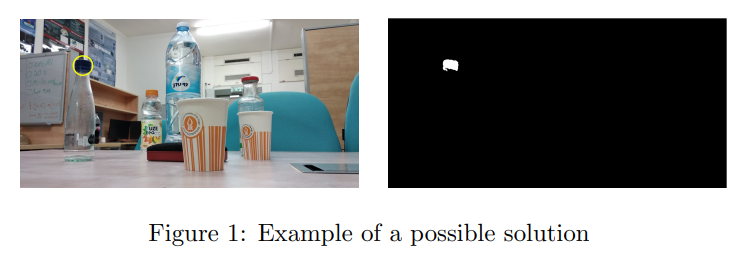

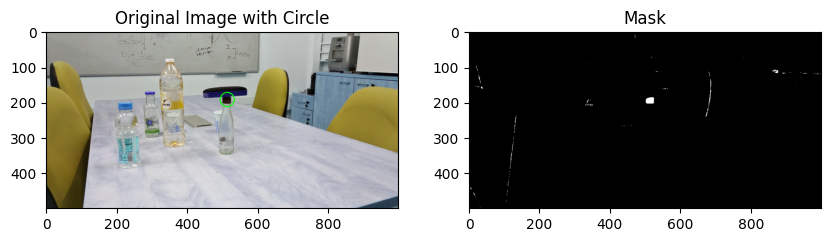

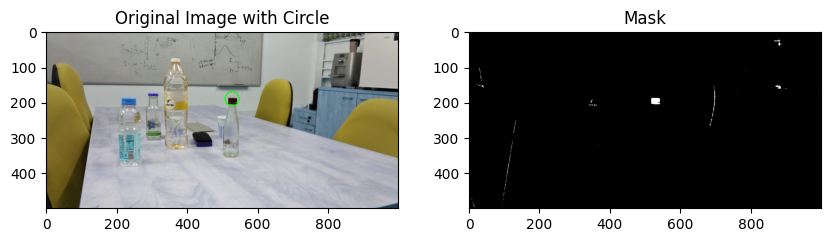

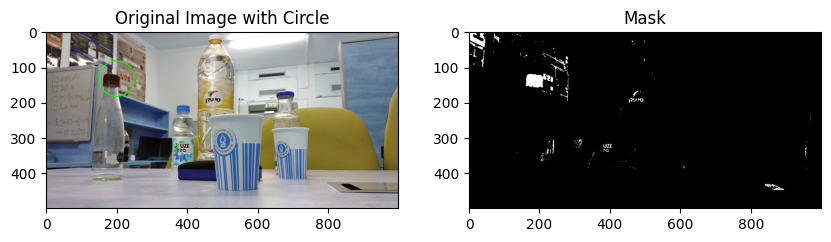

In [15]:
from scipy.ndimage import median_filter

def circle_blue_cap(image_path):
  # Convert to HSV
  image = cv2.imread(image_path)
  img = image.astype(np.float64)
  img = img / 255.0
  hsv = rgb2hsv(img)



  # Create a Mask got the bumbers after paying with it
  lower_blue = np.array([1/179, 80/255, 50/255])
  upper_blue = np.array([15/179, 255/255, 100/255])
  # Create mask based on lower and upper bounds for each channel
  blue_mask = np.zeros(hsv.shape[:2], dtype=np.uint8)  # Initialize mask

  # Apply thresholds for each channel
  blue_mask = np.where(
      np.logical_and(
          np.logical_and(hsv[:, :, 0] >= lower_blue[0], hsv[:, :, 0] <= upper_blue[0]),
          np.logical_and(hsv[:, :, 1] >= lower_blue[1], hsv[:, :, 1] <= upper_blue[1]),
          np.logical_and(hsv[:, :, 2] >= lower_blue[2], hsv[:, :, 2] <= upper_blue[2])
      ),
      255,  # Set to 255 (white) where conditions are met
      0     # Set to 0 (black) otherwise
  ).astype(np.uint8)

  # Estimate Cap Center and Radius
  y_coords, x_coords = np.where(blue_mask == 255)
  # Filter out noise again took the numbers after playing a bit
  median = np.median(x_coords)
  x_coords = x_coords[np.abs(x_coords - median) <= 50]
  median = np.median(y_coords)
  y_coords = y_coords[np.abs(y_coords - median) <= 50]
  # Calculating the center and radius
  if len(x_coords) > 0 and len(y_coords) > 0:
      center_x = int(np.mean(x_coords))
      center_y = int(np.mean(y_coords))
      radius = int(np.sqrt(len(x_coords)))

      cv2.circle(img, (center_x, center_y), radius, (0, 255, 0), 2) # Using cv2 to create a circle

  # Display the results
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img)  # Convert back to RGB for display
  plt.title('Original Image with Circle')
  plt.subplot(1, 2, 2)
  plt.imshow(blue_mask, cmap='gray')
  plt.title('Mask')
  plt.show()

# Example usage on 3 of the pics
image_path = f"{drive_path}/cap1.png"
circle_blue_cap(image_path)
image_path = f"{drive_path}/cap2.png"
circle_blue_cap(image_path)
image_path = f"{drive_path}/cap3.png"
circle_blue_cap(image_path)

**Answer :**


---
I did an alogrithem the converted to hsv(I did hsv to better find with the color) then filtered out only the intresting color I want (Create a Mask) after that I tried to find the radius (with filtering of the noise), and then ploted


# 6.2 White Balancing (Optional)

At night time, when you turn on the light, some colors may look different
than they really are. In this section you
will use white balancing to remove yellow light from an image.

* Take a picture of a white page in your apartment at night time with
the lights on. Make sure to turn off the auto white balance in your
camera. If you can't find this option ask google or take a picture
with a friend's camera.

* Read about white balancing and design an algorithm for removal of
the yellow light from the picture.

* Explain the algorithm you've used and show the results.

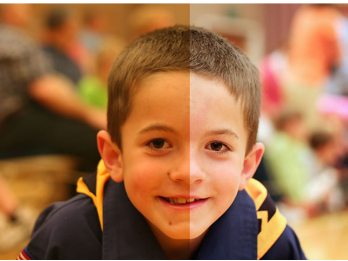

Figure 2:
 Example of yellow light influence. Photo taken from:
https://www.itsalwaysautumn.com/fix-photo-remove-yellow-color-cast.html


**Answer :**


---



# 7. Optical Illusion (Optional)

In this exercise we will trick our mind into seeing colors!
This section is not graded, but we encourage you to do it.


7.1 Read a color image using the ’imread()’ function and normalize to [0−1].


7.2 Create the negative RGB image: nRGB = 1-RGB


7.3 Create the grayscale image using your function from the first sections


7.4 Display the negative image for exactly 10 seconds and then immediately
switch to the gray scale.


7.5 Run the function and stare at the center of the image. What happens
when it switches to gray scale?

**Answer :**


---



# 8. Bonus Question
* Choose an image as you wish and manipulate it in the coolest way you can.
* Use methods from this exercise and optionally from the previous exercise. Display the initial image together with the modified image in the document. Be creative!
* One of the images will be chosen by the course staff and it's
authors will receive one bonus point to the final grade. The staff will
judge by the visual result, originality and the code.